In [2]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.6MB 21kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61c70000 @  0x7fc2db4bb2a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 102kB 4.4MB/s 
    100% |████████████████████████████████| 61kB 7.9MB/s 
    100% |████████████████████████████████| 112kB 6.4MB/s 
    100% |████████████████████████████████| 112kB 8.3MB/s 
    100% |████████████████████████████████| 2.2MB 10.9MB/s 
jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.15 which is incompatible.
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which 

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [6]:
path = untar_data('https://s3.amazonaws.com/fast-ai-imageclas/cifar10')
path

PosixPath('/root/.fastai/data/cifar10')

In [7]:
path.ls()

['test', 'train']

In [0]:
path_test = path/'test'
path_train = path/'train'

In [0]:
fnames = get_image_files(path_test)

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), valid='test', size=224, num_workers = 0)

In [0]:
data.normalize(imagenet_stats)

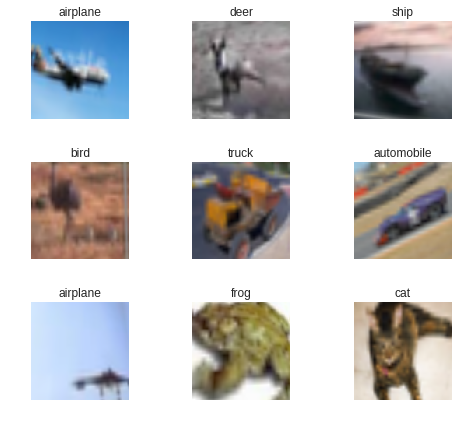

In [10]:
data.show_batch(rows = 3, figsize = (7,6))

In [11]:
print(data.classes)
len(data.classes),data.c

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


(10, 10)

In [12]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 74092768.42it/s]


In [13]:
learn.fit_one_cycle(4)

Total time: 48:05
epoch  train_loss  valid_loss  error_rate
1      0.350854    0.225949    0.077800    (12:04)
2      0.280283    0.181956    0.062300    (11:59)
3      0.212667    0.143676    0.049900    (12:00)
4      0.187221    0.136373    0.048000    (12:01)



In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

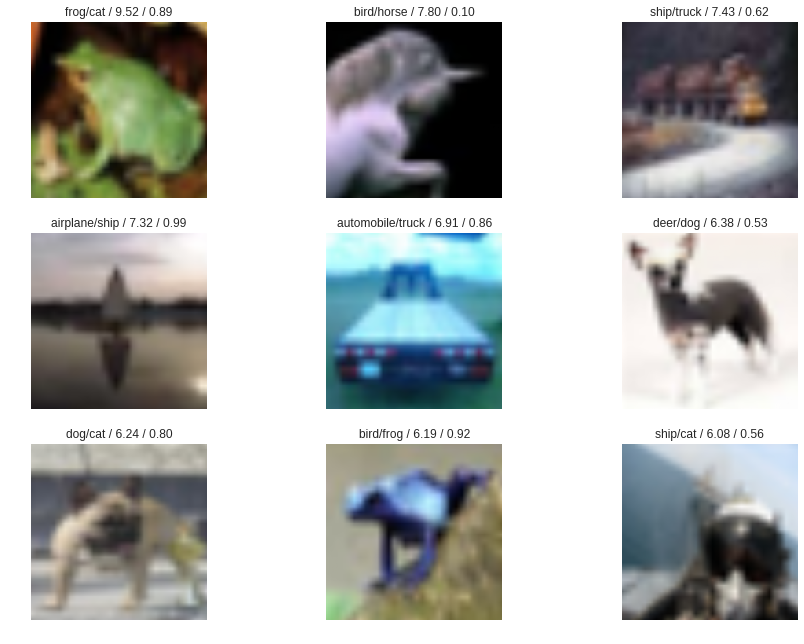

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

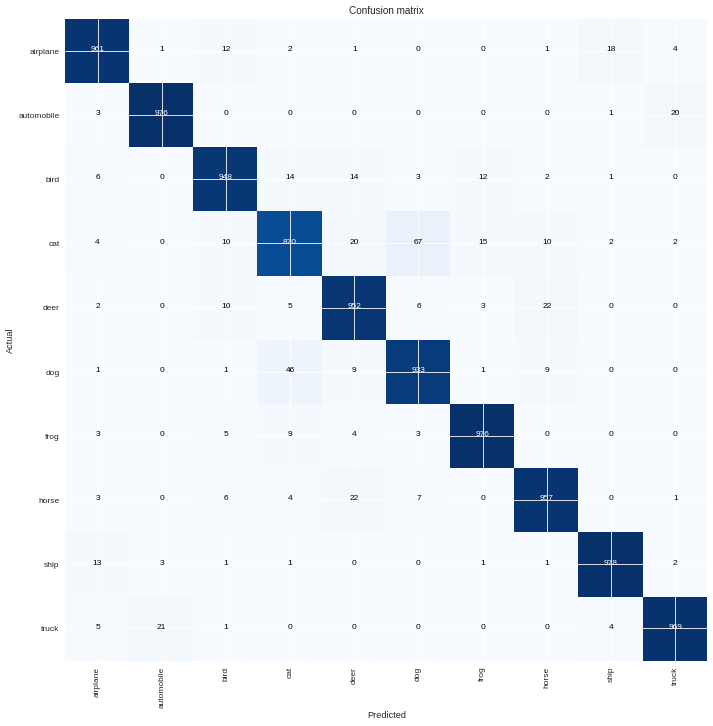

In [19]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=2)

[('cat', 'dog', 67),
 ('dog', 'cat', 46),
 ('deer', 'horse', 22),
 ('horse', 'deer', 22),
 ('truck', 'automobile', 21),
 ('automobile', 'truck', 20),
 ('cat', 'deer', 20),
 ('airplane', 'ship', 18),
 ('cat', 'frog', 15),
 ('bird', 'cat', 14),
 ('bird', 'deer', 14),
 ('ship', 'airplane', 13),
 ('airplane', 'bird', 12),
 ('bird', 'frog', 12),
 ('cat', 'bird', 10),
 ('cat', 'horse', 10),
 ('deer', 'bird', 10),
 ('dog', 'deer', 9),
 ('dog', 'horse', 9),
 ('frog', 'cat', 9),
 ('horse', 'dog', 7),
 ('bird', 'airplane', 6),
 ('deer', 'dog', 6),
 ('horse', 'bird', 6),
 ('deer', 'cat', 5),
 ('frog', 'bird', 5),
 ('truck', 'airplane', 5),
 ('airplane', 'truck', 4),
 ('cat', 'airplane', 4),
 ('frog', 'deer', 4),
 ('horse', 'cat', 4),
 ('truck', 'ship', 4),
 ('automobile', 'airplane', 3),
 ('bird', 'dog', 3),
 ('deer', 'frog', 3),
 ('frog', 'airplane', 3),
 ('frog', 'dog', 3),
 ('horse', 'airplane', 3),
 ('ship', 'automobile', 3)]

In [0]:
learn.unfreeze()

In [22]:
learn.fit_one_cycle(1)

Total time: 14:44
epoch  train_loss  valid_loss  error_rate
1      0.334468    0.219422    0.073300    (14:44)



In [0]:
learn.load('stage-1')

In [24]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


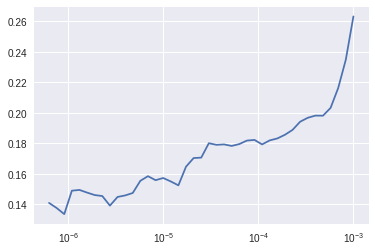

In [25]:
learn.recorder.plot()

In [26]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

Total time: 29:38
epoch  train_loss  valid_loss  error_rate
1      0.165579    0.127615    0.043500    (14:50)
2      0.146759    0.119131    0.041000    (14:48)

